# axis sharing
- x축, y축의 레이블 중복을 방지할 수 있다.
- sharex, sharey
- 여러 그래프를 그릴 때 axis sharing은 자주 발생한다.
- 레이아웃을 구성하는 각 방법들에 대해서 axis sharing이 발생하는 경우를 정리할 예정이다.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## ✅ plt.subplots

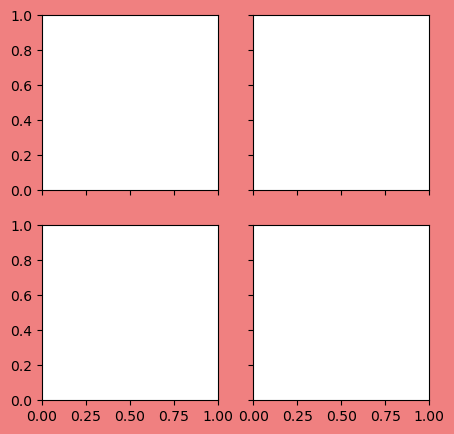

In [6]:
fig, axes = plt.subplots(2, 2,
                         figsize=(5, 5),
                         facecolor='lightcoral',
                         sharex=True, sharey=True)

(10.0, 1000.0)

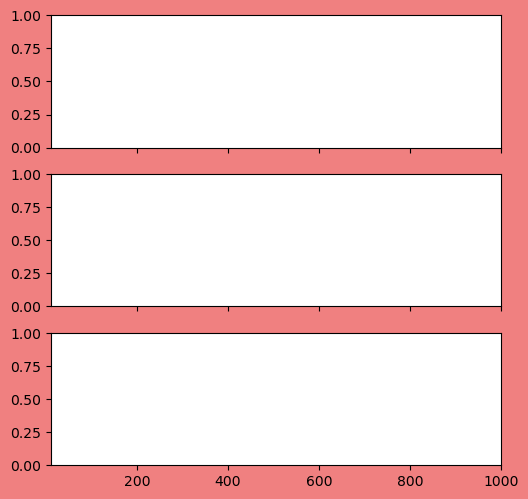

In [7]:
# 축을 공유하기 때문에 하나의 그래프에 대해서만 set_xlim을 설정해도 무방하다.
fig, axes = plt.subplots(3, 1,
                         figsize=(5, 5),
                         facecolor='lightcoral',
                         sharex=True)

fig.subplots_adjust(bottom=0.05, top=0.95, left=0.05, right=0.95,
                    hspace=0.2)
axes[0].set_xlim([10, 1000])

(0.0, 1.0)

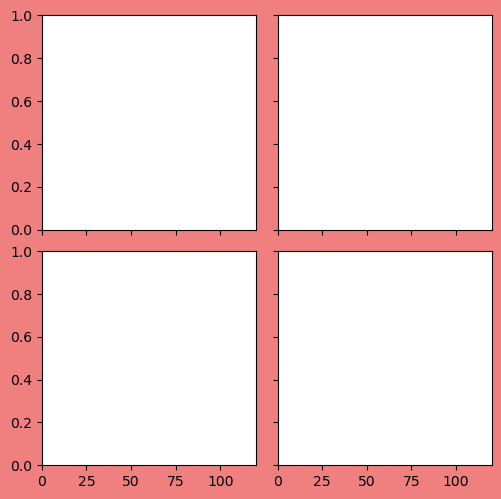

In [11]:
# 2차원
fig, axes = plt.subplots(2, 2,
                         figsize=(5, 5),
                         facecolor='lightcoral',
                         sharex=True, sharey=True)
fig.subplots_adjust(bottom=0.05, top=0.95, left=0.05, right=0.95,
                    hspace=0.1, wspace=0.1)
axes[0, 0].set_xlim([0, 120])
axes[0, 0].set_ylim([0, 1])

## ✅ fig.add_subplot
- plt.subplots 메서드와 비교해서 매개변수 sharex, sharey에 전달하는 값이 다르다.
    - 매개변수 sharex, sharey 값으로 전달하는 ax 인수의 영향을 받는 것이 특징이다.
- plt.subplots 메서드와 비교해서 공유하는 축의 tick label이 사라지지 않는다.

(0.0, 100.0)

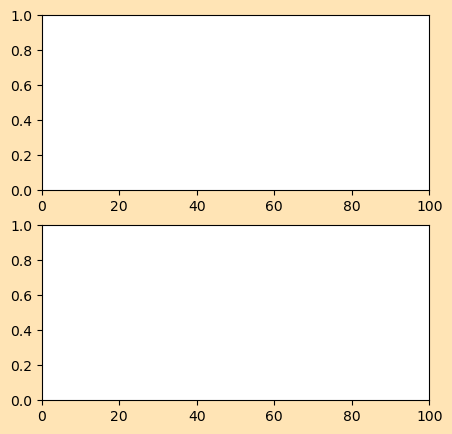

In [13]:
fig = plt.figure(figsize=(5, 5), facecolor='moccasin')

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212, sharex=ax1)
ax1.set_xlim([0, 100])

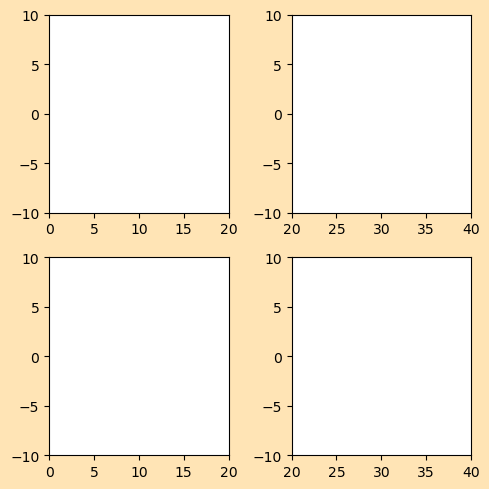

In [14]:
fig = plt.figure(figsize=(5, 5), facecolor='moccasin')

ax1_1 = fig.add_subplot(221)
ax1_2 = fig.add_subplot(222, sharey=ax1_1)
ax2_1 = fig.add_subplot(223, sharex=ax1_1)
ax2_2 = fig.add_subplot(224, sharex=ax1_2, sharey=ax2_1)

ax1_1.set_ylim([-10, 10])
ax2_1.set_ylim([-10, 10])
ax2_1.set_xlim([0, 20])
ax2_2.set_xlim([20, 40])

fig.tight_layout()

(10.0, 1000.0)

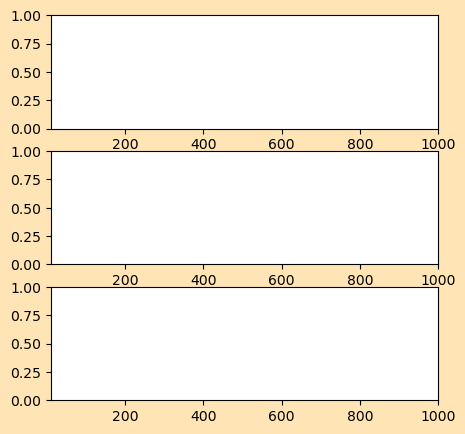

In [18]:
fig = plt.figure(figsize=(5, 5), facecolor='moccasin')

# ax1 = fig.add_subplot(311)
# ax2 = fig.add_subplot(312, sharex=ax1)
# ax3 = fig.add_subplot(313, sharex=ax1)
# ax3.set_xlim([10, 1000])

axes = np.empty((0, ))
for ax_idx in range(1, 4):
    if ax_idx == 1:
        axes = np.append(axes, fig.add_subplot(3, 1, ax_idx))
    else:
        axes = np.append(axes, fig.add_subplot(3, 1, ax_idx, sharex=axes[0]))

axes[0].set_xlim([10, 1000])

axes shape:  (3, 3)


(0.0, 300.0)

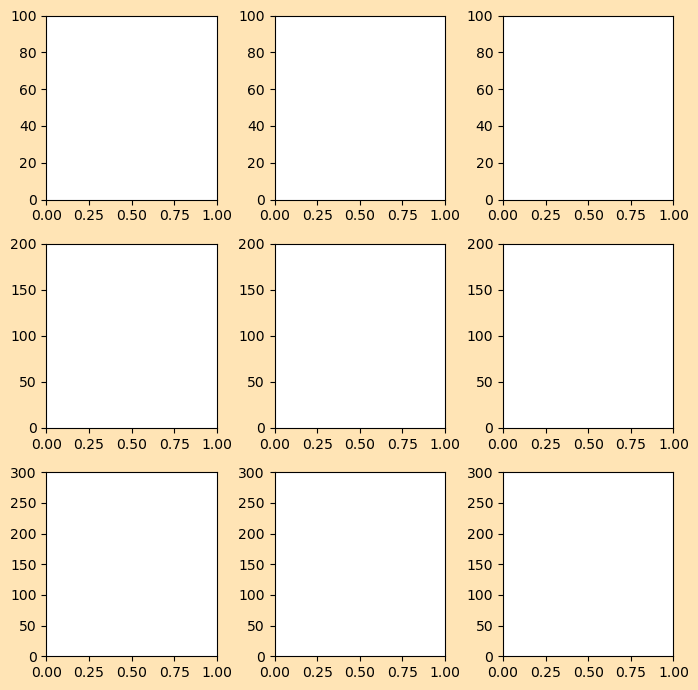

In [20]:
# y_lim 공유
fig = plt.figure(figsize=(7, 7), facecolor='moccasin')

n_row, n_col = 3, 3
axes = np.empty(shape=(0, 3))

for r_idx in range(n_row):
    # 행에 대한 그룹화
    axes_row = np.empty(shape=(0, ))
    for c_idx in range(n_col):
        if c_idx == 0:
            ax = fig.add_subplot(n_row, n_col, n_row*r_idx + c_idx + 1)
        else:
            ax = fig.add_subplot(n_row, n_col, n_row*r_idx + c_idx + 1, sharey=axes_row[0])
        axes_row = np.append(axes_row, ax)
    axes = np.vstack([axes, axes_row])

fig.tight_layout()

print('axes shape: ', axes.shape)

axes[0, 0].set_ylim([0, 100])
axes[1, 0].set_ylim([0, 200])
axes[2, 0].set_ylim([0, 300])

(0.0, 300.0)

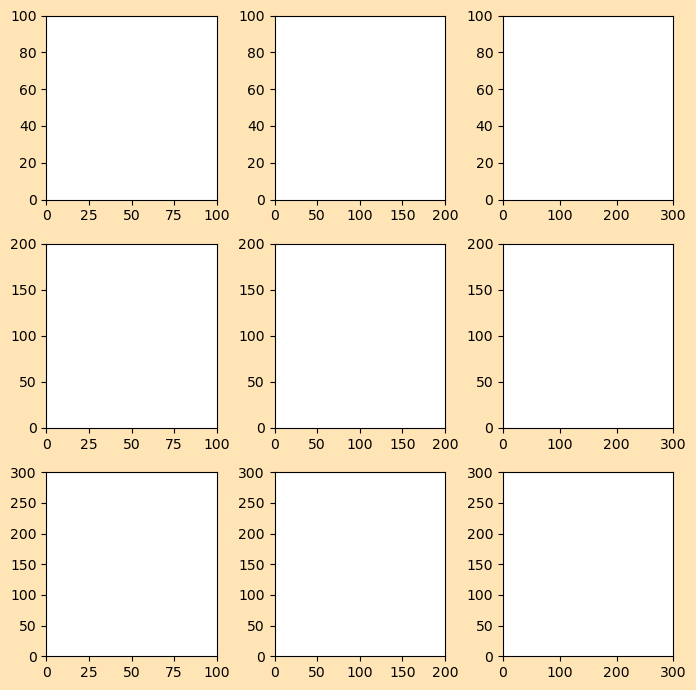

In [21]:
# x_lim 공유
fig = plt.figure(figsize=(7, 7), facecolor='moccasin')

n_row, n_col = 3, 3
axes = np.empty(shape=(0, 3))

for r_idx in range(n_row):
    axes_row = np.empty(shape=(0, ))
    if r_idx == 0:
        for c_idx in range(n_col):
            if c_idx == 0:
                ax = fig.add_subplot(n_row, n_col, r_idx * n_row + c_idx + 1)
            else:
                ax = fig.add_subplot(n_row, n_col, r_idx * n_row + c_idx + 1, sharey=axes_row[0])
            axes_row = np.append(axes_row, ax)
    else:
        for c_idx in range(n_col):
            if c_idx == 0:
                ax = fig.add_subplot(n_row, n_col, r_idx * n_row + c_idx + 1, sharex=axes[0, c_idx])
            else:
                ax = fig.add_subplot(n_row, n_col, r_idx * n_row + c_idx + 1, sharey=axes_row[0], sharex=axes[0, c_idx])
            axes_row = np.append(axes_row, ax)
    axes = np.vstack([axes, axes_row])

fig.tight_layout()

axes[0, 0].set_ylim([0, 100])
axes[1, 0].set_ylim([0, 200])
axes[2, 0].set_ylim([0, 300])

axes[0, 0].set_xlim([0, 100])
axes[0, 1].set_xlim([0, 200])
axes[0, 2].set_xlim([0, 300])

## ✅ plt.subplot2grid

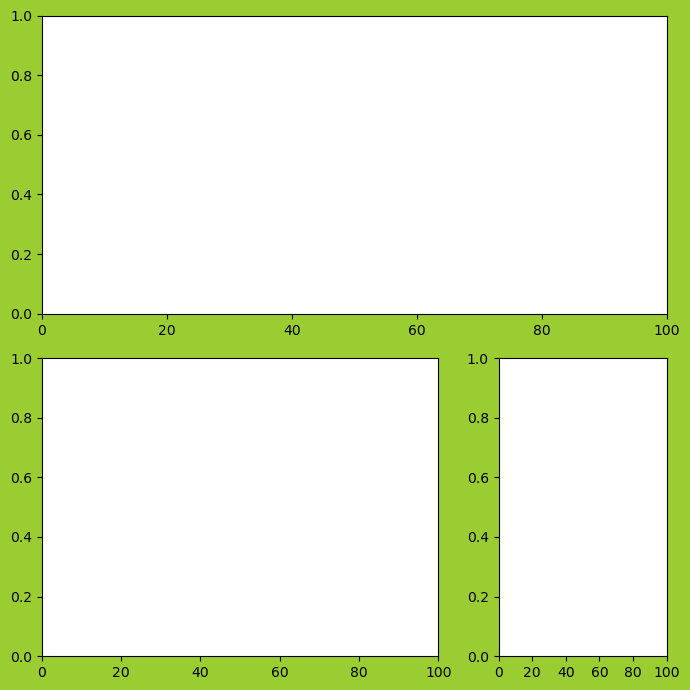

In [22]:
fig = plt.figure(figsize=(7, 7), facecolor='yellowgreen')

ax1_1 = plt.subplot2grid((2, 3), (0, 0), colspan=3, fig=fig)
ax2_1 = plt.subplot2grid((2, 3), (1, 0), colspan=2, fig=fig, sharex=ax1_1)
ax2_2 = plt.subplot2grid((2, 3), (1, 2), fig=fig, sharex=ax1_1)

ax1_1.set_xlim([0, 100])
fig.tight_layout()

## ✅ fig.add_axes

(0.0, 200.0)

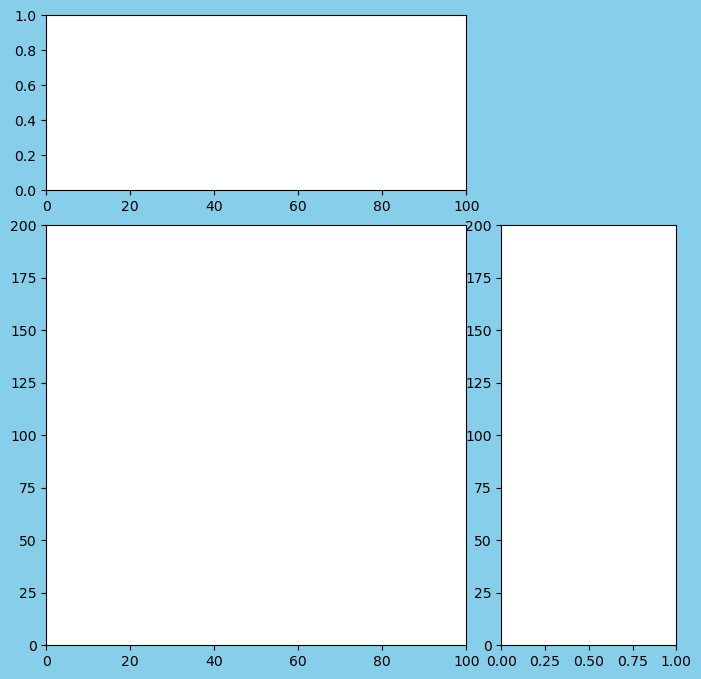

In [25]:
fig = plt.figure(figsize=(7, 7), facecolor='skyblue')

left, bottom = 0.05, 0.05
spacing = 0.05
width1, height1 = 0.6, 0.6
width2 = 1 - (2*left + width1 + spacing)
height2 = 1 - (2*bottom + height1 + spacing)

rect1 = [left, bottom, width1, height1]
rect2 = [left, bottom + height1 + spacing, width1, height2]
rect3 = [left + width1 + spacing, bottom, width2, height1]

ax1 = fig.add_axes(rect1)
ax2 = fig.add_axes(rect2, sharex=ax1)
ax3 = fig.add_axes(rect3, sharey=ax1)

ax1.set_xlim([0, 100])
ax1.set_ylim([0, 200])

## ✅ 연습문제

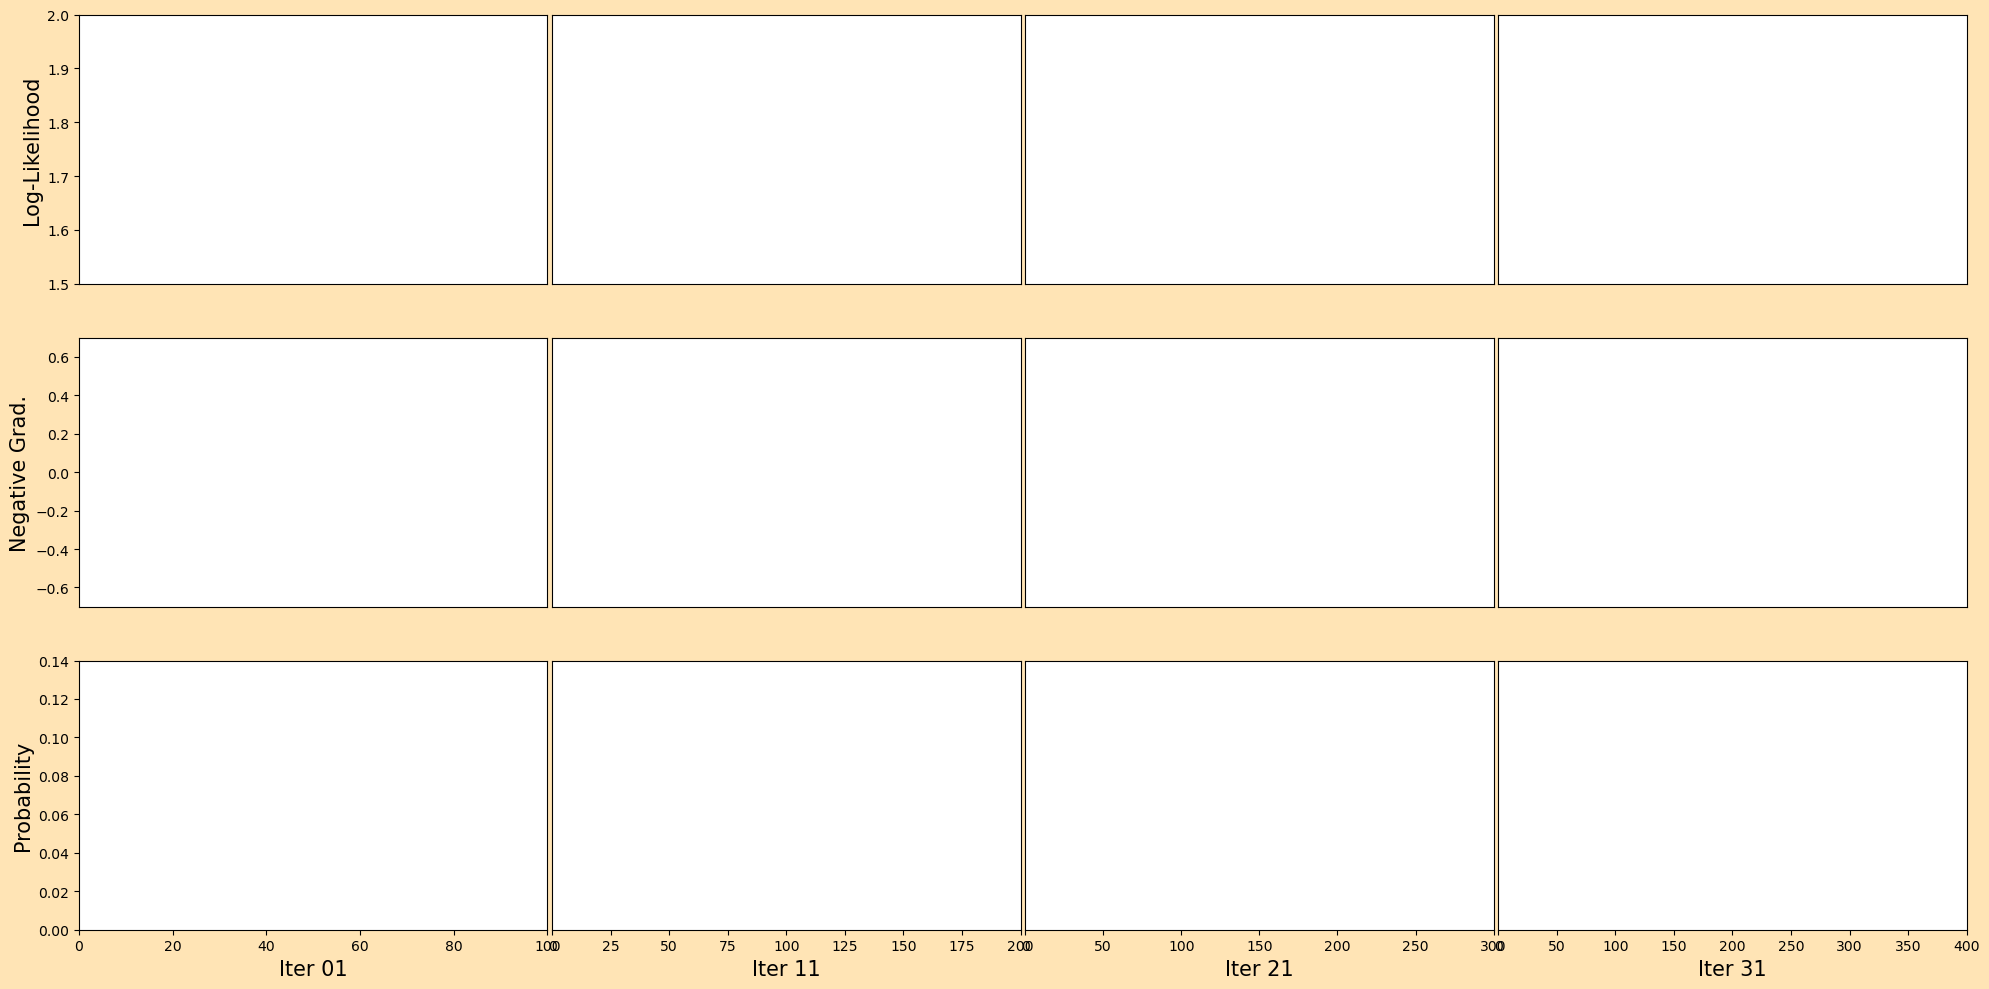

In [26]:
fig = plt.figure(figsize=(20, 10), facecolor='moccasin')

n_row, n_col = 3, 4
axes = np.empty(shape=(0, n_col))
xlabels = ['Iter 01', 'Iter 11', 'Iter 21', 'Iter 31']
ylabels = ['Log-Likelihood', 'Negative Grad.', 'Probability']

for r_idx in range(n_row):
    axes_row = np.empty(shape=(0, ))
    if r_idx == 0:
        for c_idx in range(n_col):
            if c_idx == 0:
                ax = fig.add_subplot(n_row, n_col, n_col*r_idx + c_idx + 1)
            else:
                ax = fig.add_subplot(n_row, n_col, n_col*r_idx + c_idx + 1, sharey=axes_row[0])
            axes_row = np.append(axes_row, ax)
    else:
        for c_idx in range(n_col):
            if c_idx == 0:
                ax = fig.add_subplot(n_row, n_col, n_col*r_idx + c_idx + 1, sharex=axes[0, c_idx])
            else:
                ax = fig.add_subplot(n_row, n_col, n_col*r_idx + c_idx + 1, sharex=axes[0, c_idx], sharey=axes_row[0])
            axes_row = np.append(axes_row, ax)
    axes = np.vstack([axes, axes_row])
    
axes[0, 0].set_ylim([1.5, 2.0])
axes[1, 0].set_ylim([-0.7, 0.7])
axes[2, 0].set_ylim([0, 0.14])

axes[0, 0].set_xlim([0, 100])
axes[0, 1].set_xlim([0, 200])
axes[0, 2].set_xlim([0, 300])
axes[0, 3].set_xlim([0, 400])

for ax_idx, ax in enumerate(axes.flat):
    if ax_idx % n_col == 0:
        ax.set_ylabel(ylabels[ax_idx // n_col], fontsize=15)
    if ax_idx >= 2*n_col:
        ax.set_xlabel(xlabels[ax_idx - 2*n_col], fontsize=15)
    if ax_idx % n_col != 0:
        ax.get_yaxis().set_visible(False)
    if ax_idx <= n_col*2 - 1:
        ax.get_xaxis().set_visible(False)

fig.tight_layout()
fig.subplots_adjust(hspace=0.2, wspace=0.01)

## ✅ ax.twinx
- 좌측과 우측에 서로 다른 2개의 축을 선언한다.
- 우측에 위치한 축이 새로 생성한 twinx 객체의 축에 해당한다.
- 서로 다른 데이터를 하나의 그래프에 그리고 싶지만 y축의 값이 차이가 많이 나는 경우 사용 가능하다.

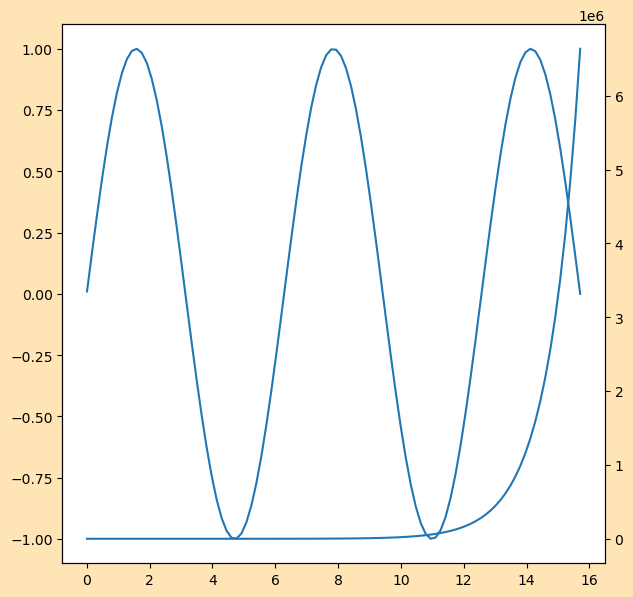

In [28]:
PI = np.pi
t = np.linspace(0.01, 5*PI, 100)
sin = np.sin(t)
exp = np.exp(t)

fig = plt.figure(figsize=(7, 7), facecolor='moccasin')
ax1 = fig.add_subplot()
ax1.plot(t, sin)

ax2 = ax1.twinx()
ax2.plot(t, exp)

Text(0, 0.5, 'Data 2')

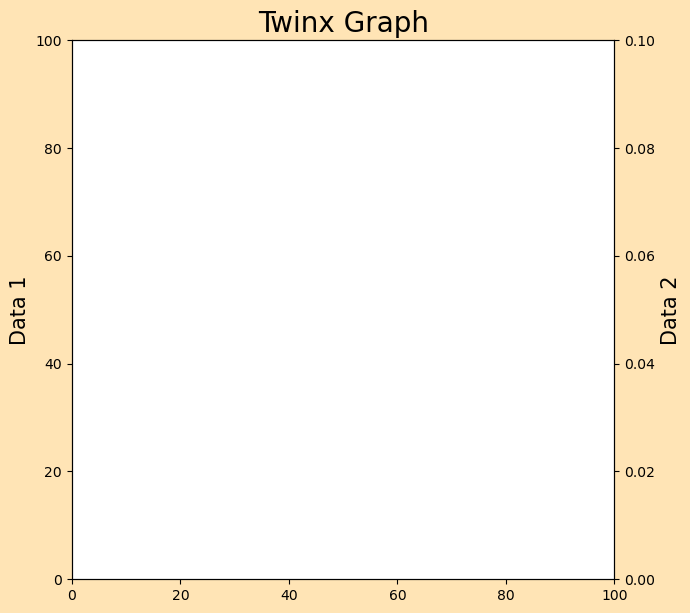

In [29]:
fig = plt.figure(figsize=(7, 7), facecolor='moccasin')

ax1 = fig.add_subplot()
ax2 = ax1.twinx()

ax1.set_xlim([0, 100])
ax1.set_ylim([0, 100])
ax2.set_ylim([0, 0.1])

ax1.set_title('Twinx Graph', fontsize=20)
ax1.set_ylabel('Data 1', fontsize=15)
ax2.set_ylabel('Data 2', fontsize=15)